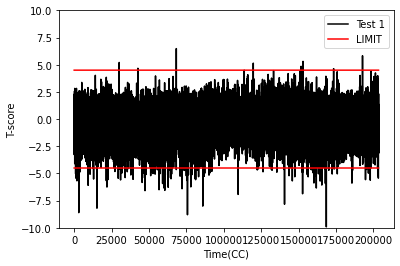

In [1]:
import trsfile
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

#Create project, provide directory for trace save
#initialize the lists
fixed_project = []
random_project = []
t=[]

#Creating file names 
name ="100k_reg_attack_test"
namefile = name +'.dat'
figfile = name +'.png'

#Deciding parameter for the trace set
#Numpoint is the number of samples you want to read per trace
numpoint_start =0
numpoint_end =203500
numpoint = numpoint_end - numpoint_start

#Number of traces you want to read from the set
start_trace =0
end_trace = 10
numtraces = end_trace - start_trace 

#Open TRS file from here
with trsfile.open('fb_100k_reg.trs', 'r') as traces:
#    print(len(traces))
    for i, trace in enumerate(traces[start_trace:end_trace]):
        if(i%2):
            fixed_project.append(trace[numpoint_start:numpoint_end])
        else :
            random_project.append(trace[numpoint_start:numpoint_end])

#Do the TVLA test for fixed vs random groups
t = ttest_ind(fixed_project, random_project, axis=0, equal_var=False)[0]

#Save the t-test result to a dat file 
# t.tofile(namefile) #uncomment this line to save the result to a file

#plot the full t-test
e1 = np.zeros(numpoint) #no. of samples per trace
e1.fill(4.5)
e2 = np.zeros(numpoint)
e2.fill(-4.5)

plt.plot(t,'black')
plt.plot(e1,'red')
plt.plot(e2,'red')
plt.legend(['Test 1',"LIMIT"])
plt.ylim([-10, 10])
plt.xlabel("Time(CC)")
plt.ylabel("T-score")
# plt.savefig(figfile) #uncomment to save the figure
plt.show()

